![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/SAS reto"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/SAS reto


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [2]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 23.4 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=21d94ced7ae22c8805a0e4fed7125e4571071be7f6c70c0b3de3505078977a43
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [3]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the OMR user id: a00827284@tec.mx
Please enter the password for OMR user : ··········
SAS Connection established. Subprocess id is 340



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SAS reto/sascfg_personal.py
WORK Path             = /saswork/SAS_workA1A300003A2C_odaws01-usw2-2.oda.sas.com/SAS_work638800003A2C_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 14892


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [4]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 12:56:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 12:56:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
import pandas as pd

#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

In [6]:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import numpy                   as np

## Merge the Data

In [7]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge = data_merge.loc[(data_merge['GaveThisYear'] ==1)]
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
965284,2965285.0,JACKSON,MARY,1.0,32.0,17500.0,University / College,City,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,100.0
192972,2192973.0,MORRIS,DOLORES,1.0,20.0,8500.0,University / College,City,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,30.0


## Treating Missing Values

>Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [8]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
292308,2292309.0,CROMLEY,FAITH,1.0,29.0,16200.0,University / College,City,10.0,2.0,...,3.0,10.0,165.0,15.0,75.0,0.0,0.0,1.0,1.0,20.0
975864,2975865.0,CONNORS,ANTHONY,0.0,28.0,22800.0,High School,Rural,10.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,20.0
376375,2376376.0,SMITH,DOUG,0.0,30.0,57300.0,High School,City,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,10.0
921211,2921212.0,DUMM,ROLANDO,0.0,30.0,29500.0,High School,Rural,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,1.0,100.0,0.0,1.0,20.0
787906,2787907.0,BROWN,DONALD,0.0,39.0,37800.0,High School,City,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,20.0


## Data Partition

In [9]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.5,random_state=5678) # you can change the percentage
train.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
721362,2721363.0,WALROD,FRANCISCO,0.0,87.0,49400.0,High School,Suburban,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,1.0,25.0,0.0,1.0,20.0
877370,2877371.0,THOMAS,WILLARD,0.0,90.0,11400.0,High School,Rural,8.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,30.0
440025,2440026.0,JOHNSON,ROSEMARIE,1.0,57.0,60000.0,University / College,Rural,7.0,0.0,...,2.0,2.0,30.0,10.0,20.0,0.0,0.0,0.0,1.0,10.0
781819,2781820.0,ROY,MELISSA,1.0,54.0,161900.0,University / College,City,2.0,1.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,50.0
110122,2110123.0,WATKINS,FRITZ,0.0,42.0,78000.0,University / College,City,9.0,5.0,...,3.0,9.0,45.0,10.0,25.0,1.0,10.0,0.0,1.0,25.0



## Prebuilt Models

***
### Linear Regression Model


> The [sk-learn library]( https://scikit-learn.org/stable/index.html) offers more advanced models. 

In [16]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[ 51.16213414  13.54362045 120.78262404 ...  37.6595094   68.71680603
  60.2614866 ]


In [17]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

63.977629882676396
54397.08072509484
233.23181756590338


##**Random Forest**

In [10]:
from sklearn.ensemble import RandomForestRegressor
X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_valid = validation['AmtThisYear']


{1: 62880.47354440804, 2: 58149.24150736441, 3: 56795.10363244615, 4: 56092.56169687015, 5: 55674.220026772295, 6: 55584.81907156337, 7: 55245.388593640724, 8: 55141.49413541755, 9: 55051.251425734285, 10: 54892.0023409593, 11: 54838.261118077105, 12: 54659.651025924315, 13: 54699.613868139924, 14: 54609.77870661348, 15: 54549.3533348916}


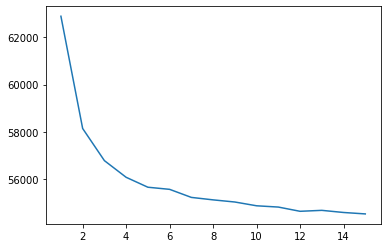

In [11]:
from sklearn.metrics import mean_squared_error

leaves= {}
xl, yl = [], []
for leaf in range(1,16):
    clf = RandomForestRegressor(min_samples_leaf = leaf)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    leaves[leaf] = mean_squared_error(Y_valid,y_pred)
    xl.append(leaf)
    yl.append(mean_squared_error(Y_valid,y_pred))

#MIN SAMPLE LEAF 6
print(leaves)
plt.plot(xl,yl)
plt.show()

{1: 54644.32298965392, 2: 54369.58432109786, 3: 53969.09486293619, 4: 53877.008002953255, 5: 53873.339763711905, 6: 53883.28424193197, 7: 53944.87704931222, 8: 54019.6848493812, 9: 54112.69681956333, 10: 54200.600912815025, 11: 54267.56754261062, 12: 54360.1608660585, 13: 54418.699701352125, 14: 54429.988482321525, 15: 54630.90682938144, 16: 54561.04673113695, 17: 54545.41092116489, 18: 54585.48190652886, 19: 54631.992584482694}


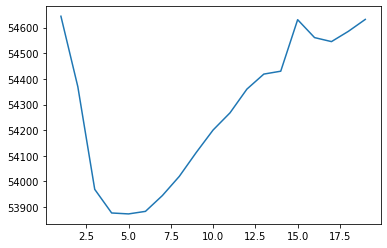

In [39]:
depths= {}
xd, yd = [], []
for depth in range(1,20):
    clf = RandomForestRegressor( min_samples_leaf = 14, max_depth=depth)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    depths[depth] = mean_squared_error(Y_valid,y_pred)
    xd.append(depth)
    yd.append(mean_squared_error(Y_valid,y_pred))


#DEPTH 3 FOR OPTIMAL
print(depths)
plt.plot(xd,yd)
plt.show()

In [40]:
RF= RandomForestRegressor(criterion='squared_error',  min_samples_leaf = 14, max_depth=5)
RF_model=RF.fit(X_train,Y_train)
RF_predict = RF_model.predict(X_valid)

In [41]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,RF_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,RF_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,RF_predict)))

63.207808399515145
53857.12295083474
232.07137469070747


## Regression Tree Model（Py）

In [12]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities' ]] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 51.14299611  27.27249619 139.59760274 ...  52.95749142  47.21358603
  67.88028169]


In [14]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

63.45359546478338
54557.807029103526
233.5761268389891


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html


## Scoring New Data

### Prepare data for scoring

In [35]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

In [42]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_contact[['Age', 'Salary','Contact','MinGift', 'AmtLastYear','GaveLastYear','Woman', 'NbActivities' ]] 

regr_predict_contact=RF_model.predict(X)

scoring_data_contact['Prediction'] = regr_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,ID,AmtContact
0,2000001.0,63.741019
1,2000002.0,55.035638
2,2000003.0,100.360447
3,2000004.0,43.788556
4,2000005.0,108.218092


### Predict 'amount given' for members who were not contacted

In [44]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)

#scoring_data_nocontact.head()

X = scoring_data_nocontact[['Age', 'Salary','Contact','MinGift','AmtLastYear', 'GaveLastYear','Woman', 'NbActivities' ]] 

regr_predict_nocontact=regr.predict(X)

scoring_data_nocontact['Prediction'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,ID,AmtNoContact
0,2000001.0,70.365631
1,2000002.0,62.972377
2,2000003.0,72.307167
3,2000004.0,42.683711
4,2000005.0,77.624200


In [45]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
0,2000001.0,63.741019,70.365631
1,2000002.0,55.035638,62.972377
2,2000003.0,100.360447,72.307167


## Exporting Results to a CSV File

In [46]:
result_Amt.to_csv('Round2_Output_amt.csv', index=False)

In [ ]:
# Reminder: You are now done with step 1 of Round 2 on predicting the conditional amount.
# Next, to complete Round2, you need to perform step 2 to predict the probability of giving, calculate the uplift and prepare your decision.

In [ ]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2000001.0,65.41565172857224,70.36563134075104
2000002.0,58.02239763644701,62.972377248625804
2000003.0,67.35718778191847,72.30716739409728
2000004.0,37.733731742296456,42.683711354475264
2000005.0,72.67422014920815,77.62419976138696
2000006.0,31.61555694917946,36.56553656135826
2000007.0,37.76026216815852,42.71024178033733
2000008.0,58.881840764009134,63.831820376187935
2000009.0,37.92037153344358,42.87035114562238
